# Analysis of Water Potability Data

## What is Potability?
Potability basically means suitability for drinking. So here we will be analyzing the data which helps us decide whether a given sample of water is potable or not.

## Which data and where did you get it from? 
The data which will be used consists of factors that are taken into considerations while checking the potability of a given sample of water. We shall look into the details of the dataset later.

Data Souce: https://github.com/MainakRepositor/Datasets/blob/master/water_potability.csv

## Is there any structure of the Analysis? 
 Sure!! following is an broad understanding of the process and then we shall go in detail:
 - Broad Analysis
 - Data Cleaning, if any
 - Univariate Analysis
 - Multivariate Analysis






## 1. Broad Analysis of the dataset

 ### 1.1 Importing Modules
  Let's import all the required modules for the analysis.



In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

 ### 1.2 Loading the dataset
  Taking the file and loading as a dataframe. The dataframe will help us convert the raw data in a tabular format for ease of analysis. After loading the dataset, we'll have a broad view of the dataset.

In [16]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


   As we can see, there are rows and columns. The columns indicate the factors taken into consideration and the rows simply indicate the samples of the water taken for testing.

   Now, let's see the overall shape of the dataset.


In [19]:
df.shape

(3276, 10)

- No. of rows(samples) : 3276
- No. of columns(factors) : 10

### 1.3 Knowing the features of the dataset

Let's see what all factors are used in the test of water potability.

In [21]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

The following factors/features are taken into consideration for this test:

- **ph** : The pH value of the water sample.
- **Hardness** : Hardness of the water sample.
- **Solids** : Measure of any solids present in the water sample.
- **Chloramines** : Measure of any chloramines present in the water sample.
- **Sulfate** : Measure of any sulfates present in the water sample.
- **Conductivity** : Measure of conductivity present in the water sample.
- **Organic_carbon** : Measure of oragnic carbon content present in the water sample.
- **Trihalomethanes** : Measure of any trihalomethanes in the water sample.
- **Turbidity** : Measure of turbidity in the water sample.
- **Potability** : A label whether the water sample is potable or not.

## 2. Data Cleaing 

### 2.1 Checking duplicates
Time to check if there are any duplicate sample observations in the data.

In [23]:
df.duplicated().sum()

0

**This means there are no duplicates in the dataset.**

### 2.2 Checking Missing Values

Now let's see if there are any missing values in the dataset.

In [24]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**There are three features with missing values!!!**

We have to deal with all of these missing values, but we don't know what how. Let's analyze these features a bit more in detail. The distribution can help us decide what method to use while dealing with these values.

#### 2.2.1 Dealing with Missing values

Let's check the distribution of these features before making a decision. Here I am plotting a histogram for all the three features in question. 

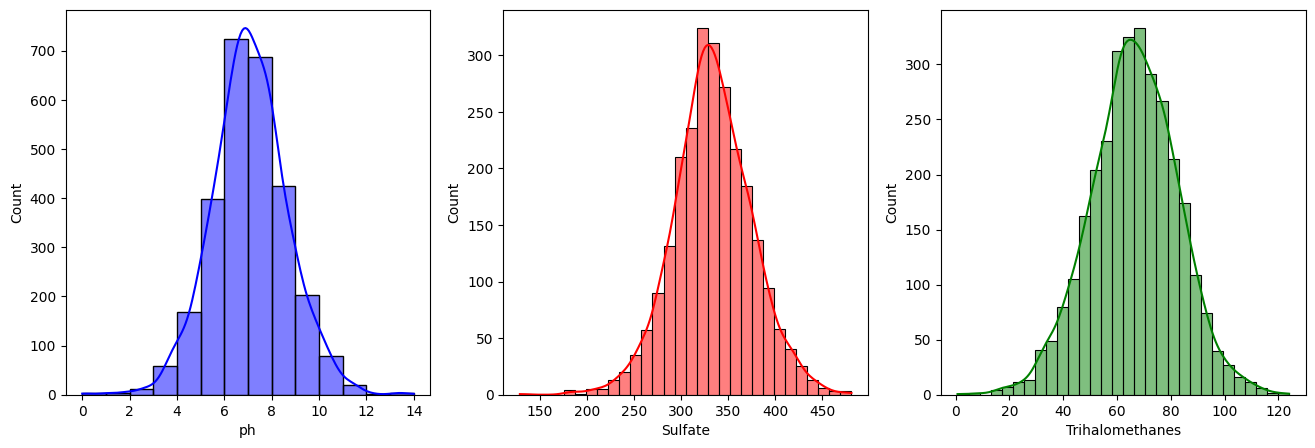

In [25]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
sns.histplot(data=df,x='ph',bins=14,kde=True,color='b')
plt.subplot(132)
sns.histplot(data=df,x='Sulfate',bins=30,kde=True,color='r')
plt.subplot(133)
sns.histplot(data=df,x='Trihalomethanes',bins=30,kde=True,color='g')
plt.show()

The above ditributions are very much closer to a symmetrical distribution around the middle region, making it closer to a normal distribution. Thus it's likely for majority of the datapoints to be concentrated around the mean.


 **Hence, I think it's a fair assumption to replace the missing values of these features with the mean of the respective samples.**



**One important observation** : Ideally I don't consider the feature which has more missing values than 20% of the complete sample. But in this case, the feature **Sulphates** have approx 23% of the sample as missing values. However,in this case I am considering it a safe margin to include it as I think there's enough data to still consider the role of sulphates in the potability test. Hence I am including it with the necessary changes.



Now let's replace the missing values of the given samples with the mean of the respective sample.

In [36]:
df['ph'].fillna(df['ph'].mean(), inplace = True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace = True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace = True)

df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**Now we can see that there are no more missing values in the dataset. We have successfully dealt with the missing values. Now we can carry on with the rest of the analysis.**

## 3. Data Exploration 


### 3.1. Checking the statistics of the dataset

Now let's check the statistics of the dataset for further understanding 

In [37]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### Insights:
- The units of the numerical features don't seem to be the same by looking at the minimum and maximum values of each feature
- Some manner of standardization would be better if we really want to check the above data in a uniformed format.
- Looking at the minimum, maximum, the percentiles and the standard deviation of all features, the numbers seem to have a fair distribution.
- The feature **Potability** seems like a binary outcome feature as it ranges from 0 to 1.

### 3.2. Checking data types of the features

Let's look at the data type of each feature

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Insights 
- All features are numeric.
- **Potability** seem to be more of a label as it's an integer while all other features are float.
- All features are Non-Null.

### 3.3. Checking the number of unique values 

In [43]:
df.nunique()

ph                 2786
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

### Insights 
- Almost all features have each value of the dataset per feature as unique .
- The only features that don't follow the above trend are **ph**, **Sulfates** and **Trihalomethanes** as we substituted multiple missing values with their respective means.
- **Potability** is  a binary label as it consists of only two unique integers.

## 4. Univariate Analysis 

Time to check each and every feature by itself and then using our label feature **Potability**

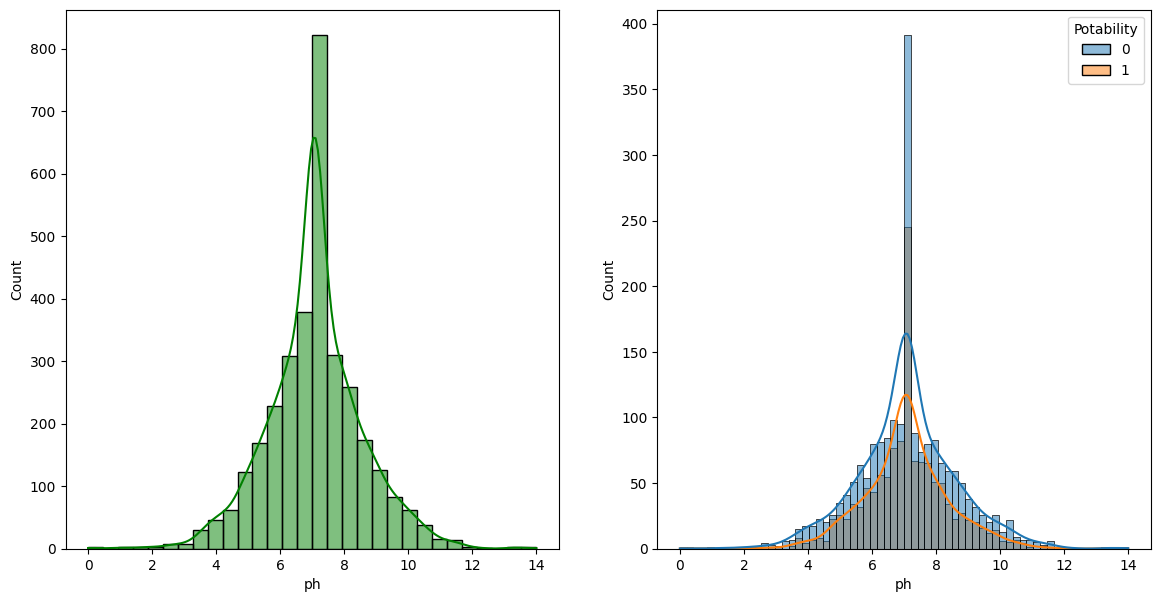

In [46]:
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df,x='ph',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='ph',kde=True,hue='Potability')
plt.show()

### Insights 
- Data heavily concentrated around the mean because of filling in the missing values with the mean.
- Also means the mean initially was around the middle of the distribution. The actual dataset wasn't skewed that much to the extreme.
- No apparent relation between the pH value and the potability.

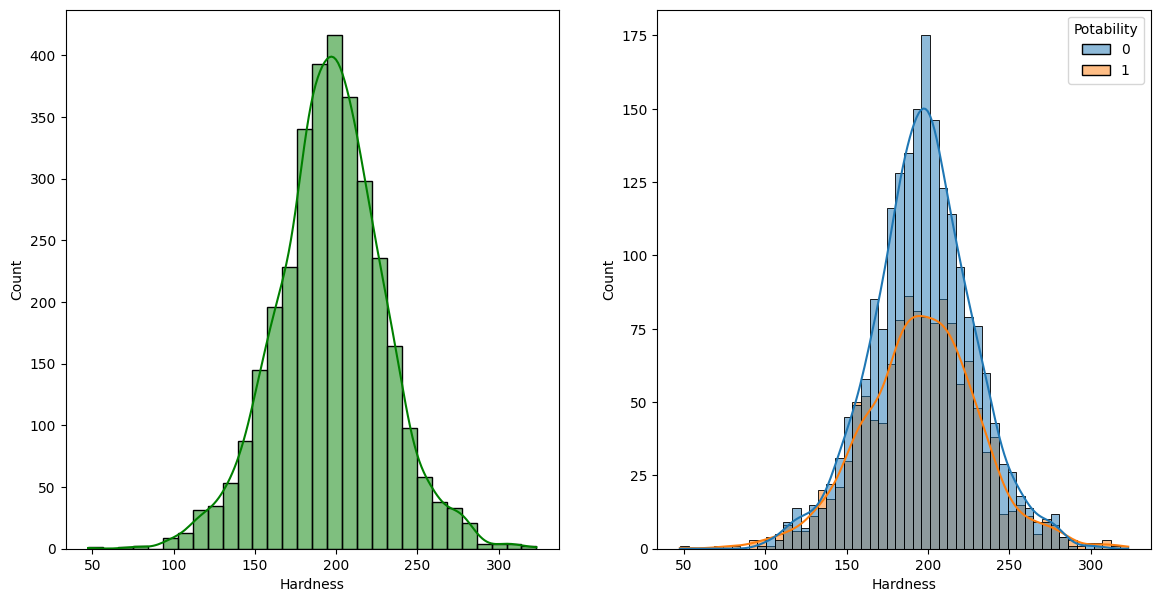

In [48]:
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df,x='Hardness',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Hardness',kde=True,hue='Potability')
plt.show()

### Insights 
- Data has a fair amount of variance throughout the distribution.
- No extreme skewness detected.
- No apparent relation between the Hardness of water and the potability.

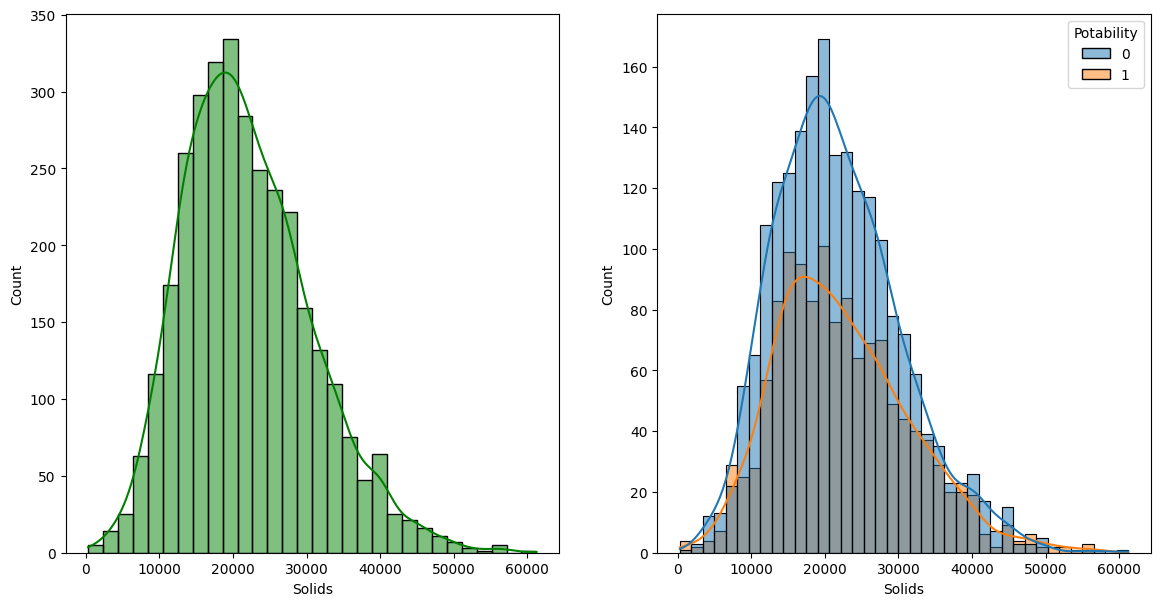

In [49]:
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df,x='Solids',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Solids',kde=True,hue='Potability')
plt.show()

### Insights 
- Data seems a bit skewed to the right but the skewness is slight.
- No apparent relation between the amount of solids and the potability.

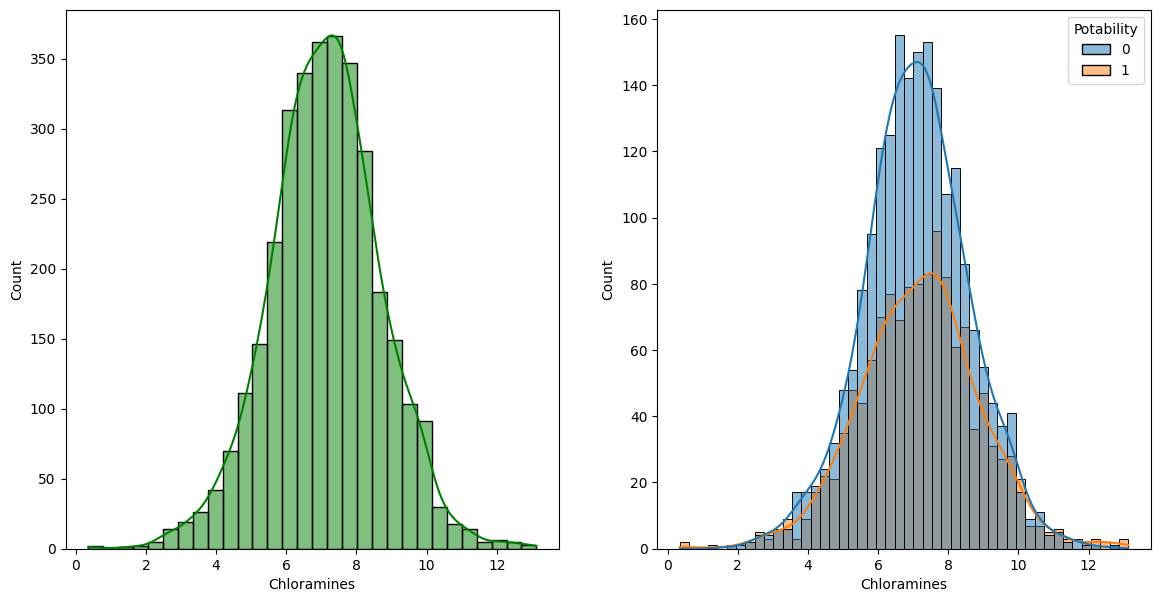

In [50]:
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df,x='Chloramines',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Chloramines',kde=True,hue='Potability')
plt.show()

### Insights 
- Data decently distributed.
- No apparent relation between the amount of chloramines and the potability.

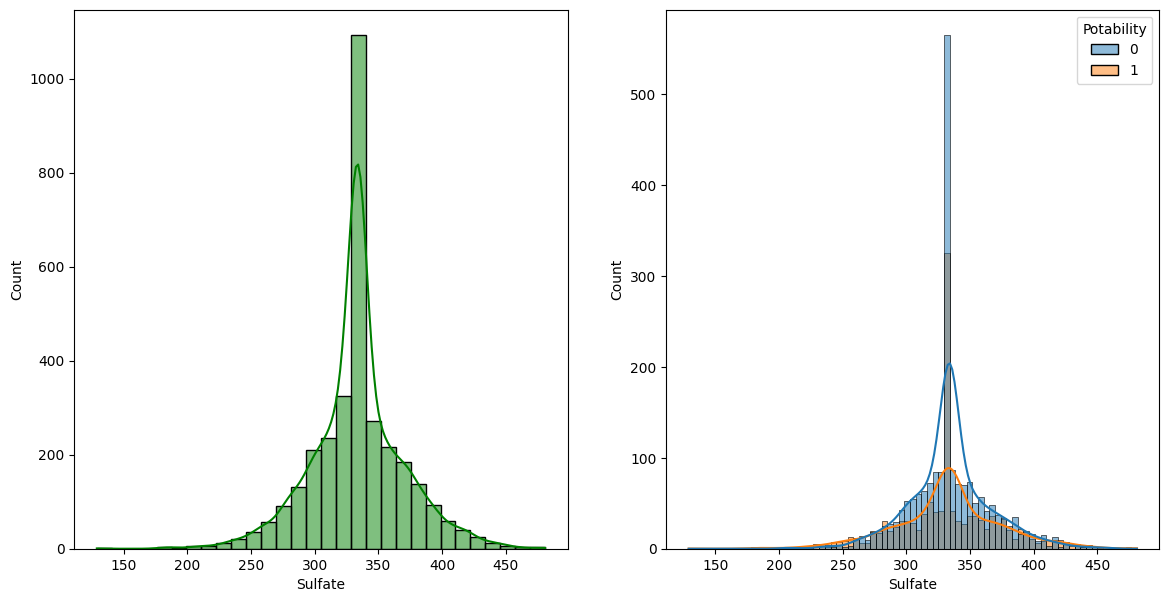

In [51]:
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df,x='Sulfate',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Sulfate',kde=True,hue='Potability')
plt.show()

### Insights 
- Data heavily concentrated around the mean because of filling in the missing values with the mean.
- Seems like initially the data was a bit skewed to the left.
- No apparent relation between the sulfate amount and the potability.

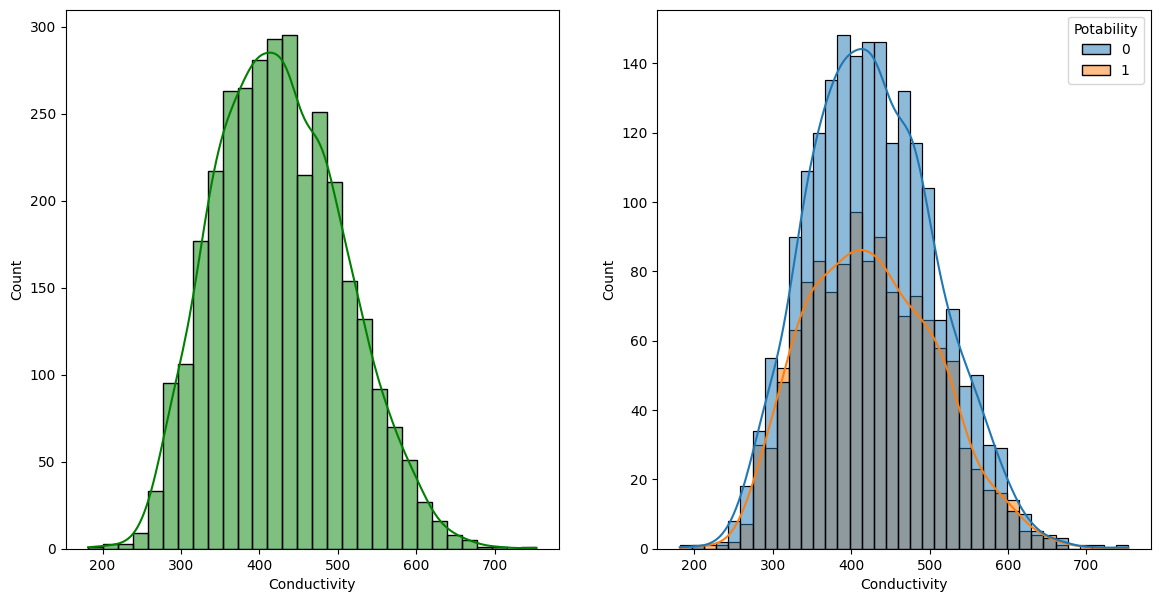

In [52]:
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df,x='Conductivity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Conductivity',kde=True,hue='Potability')
plt.show()

### Insights 
- Data distributed decently.
- No apparent relation between the conductivity and the potability.

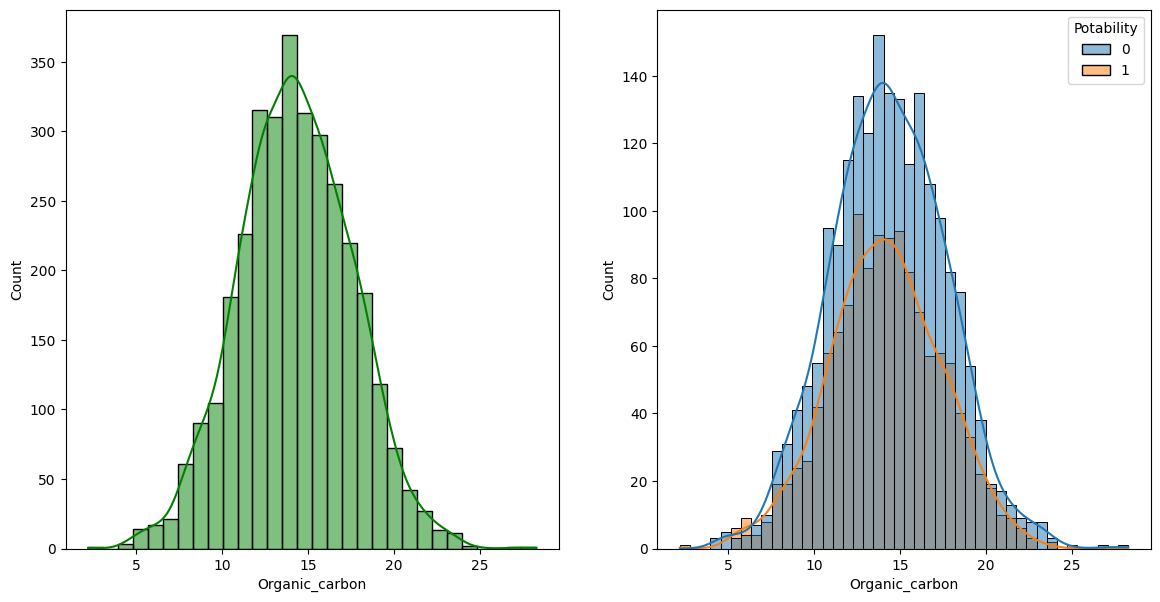

In [53]:
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df,x='Organic_carbon',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Organic_carbon',kde=True,hue='Potability')
plt.show()

### Insights 
- Data distributed decently.
- No apparent relation between the organic carbon content and the potability.

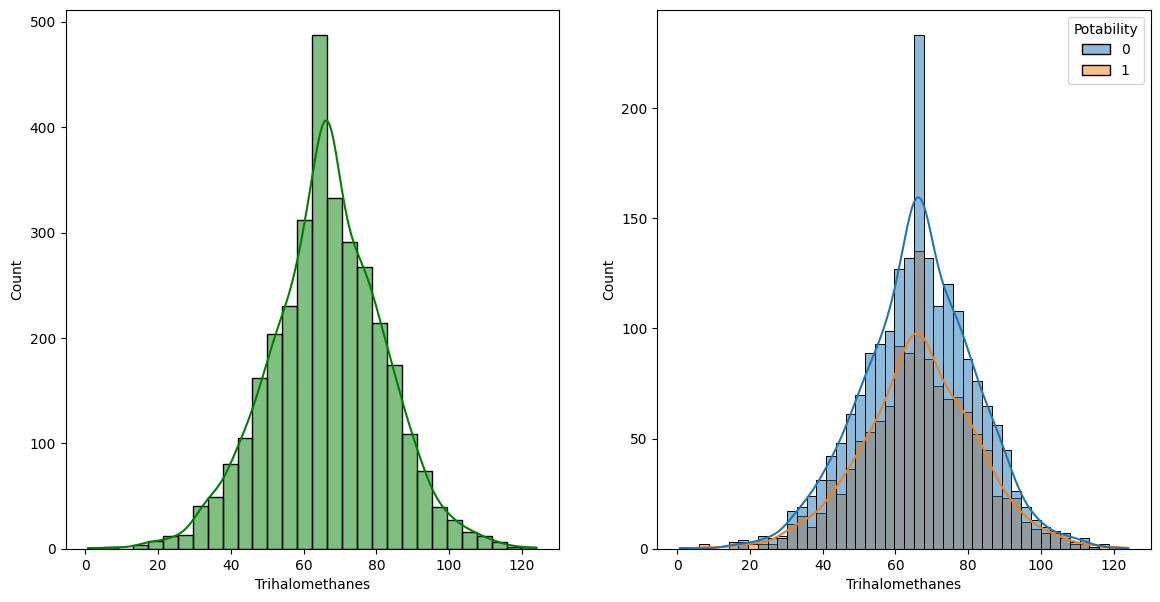

In [54]:
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df,x='Trihalomethanes',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Trihalomethanes',kde=True,hue='Potability')
plt.show()

### Insights 
- Data heavily concentrated around the mean because of filling in the missing values with the mean.
- Also means the mean initially was around the middle of the distribution. The actual dataset wasn't skewed that much to the extreme.
- No apparent relation between the trihalomethane concentration and the potability.

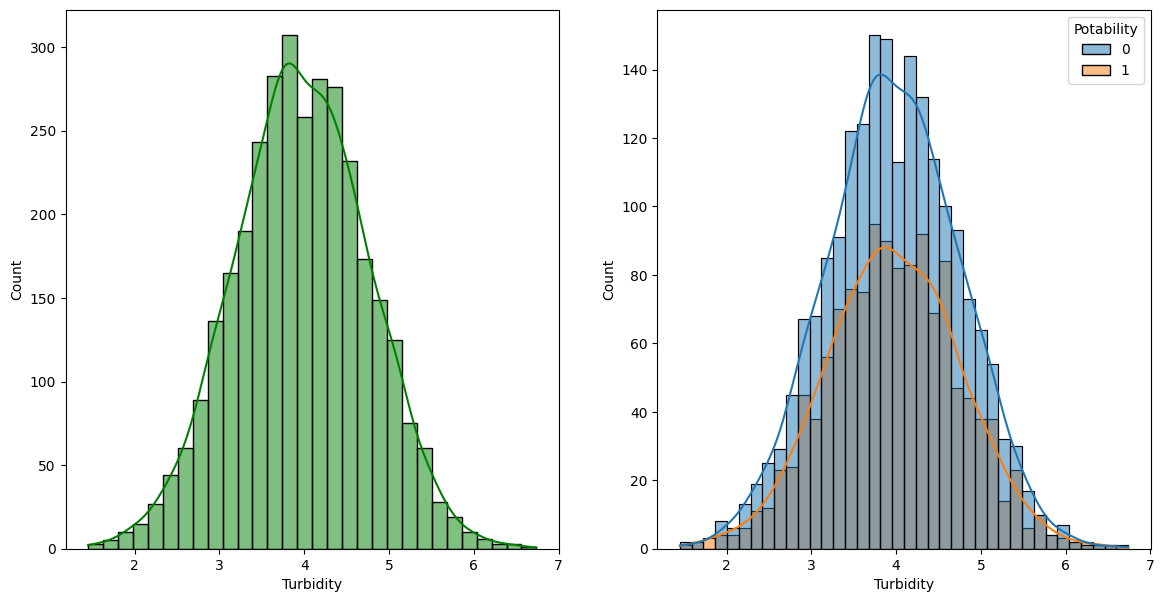

In [55]:
plt.subplots(1, 2, figsize=(14, 7))
plt.subplot(121)
sns.histplot(data=df,x='Turbidity',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Turbidity',kde=True,hue='Potability')
plt.show()

### Insights 
- Data decently distributed.
- No apparent relation between the Turbidity level and the potability.

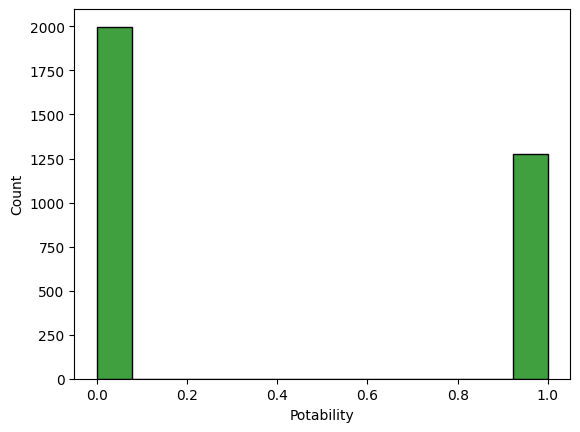

In [61]:
sns.histplot(data=df,x='Potability',color='g')
plt.show()

### Insights 
- There are more 0 values than 1 values.
- But the diffrence between the counts isn't that significant to imbalance the dataset. Hence we can say that this dataset is balanced.